In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from tqdm import tqdm
from PIL import Image

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision.io import read_image
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.transforms.functional import to_pil_image
from torchvision import transforms, utils
import torch.optim as optim
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import torch.nn.functional as F
from torchvision import models

from utils import *

## Load the data

In [2]:
# Define transform to reshape image to 256x256 and normalise to ImageNet standards
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std = [0.229, 0.224, 0.225]
        )
    ])

In [3]:
img_dir = "C:/Users/gatla/OneDrive/BSE/Thesis/labelled_dataset/all_frames"

# Define datasets for val/test
val_dataset = WarDataset(img_dir, 'data/val_labels.csv', transform=transform)
test_dataset = WarDataset(img_dir, 'data/test_labels.csv', transform=transform)

# Create DataLoaders
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Load the model

TO DO: Angelo to confirm optimal architecture and appropriate place to save the weights

In [4]:
# Define model architecture to load weights into
trained_model = torchvision.models.resnet50(weights=("pretrained", models.ResNet50_Weights.IMAGENET1K_V1))

num_ftrs = trained_model.fc.in_features

trained_model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 1)
)

# Load weights from optimal model
trained_model.load_state_dict(torch.load("C:/Users/gatla/Downloads/resnet50_TL-L3&4.pth", map_location=lambda storage, loc: storage))

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model.to(device)

c:\Users\gatla\anaconda3\envs\pytorch_image\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Test predictions

In [5]:
test_images, test_labels, test_probs = evaluate_model_with_images(trained_model, test_loader, device=device)
val_images, val_labels, val_probs = evaluate_model_with_images(trained_model, val_loader, device=device)

Evaluating: 100%|██████████| 49/49 [02:21<00:00,  2.88s/batch]


In [7]:
# Calculate the best threshold
best_threshold, best_f1 = find_best_threshold(val_labels, val_probs)
print(f"Best Threshold: {best_threshold}")
# Generate final predictions based on optimal threshold
test_preds = [1 if prob >= best_threshold else 0 for prob in test_probs]

Best Threshold: 0.64


Plotting the computed metrics

TO DO: Re-run this file after proper weights have been trained from train_csv file

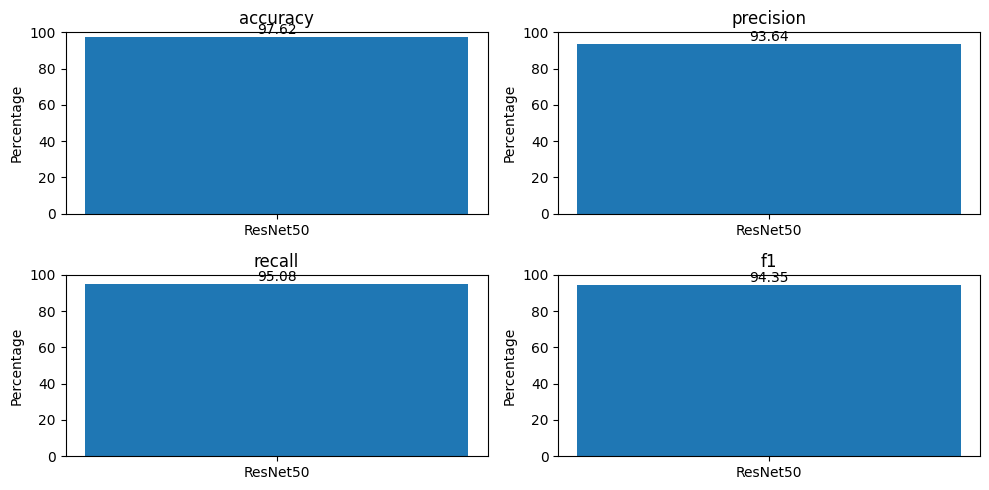

In [45]:
metrics = Metrics()
metrics.run(test_labels, test_preds, "ResNet50")
metrics.plot()

# Confusion Matrix

In [ ]:
# Counfusion Matrix

## Analysis of False Positives

C:\Users\gatla\AppData\Local\Temp\ipykernel_72564\2707518648.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = round(float(self.probs[i+index]), 3)


Last plotted image index: 1163


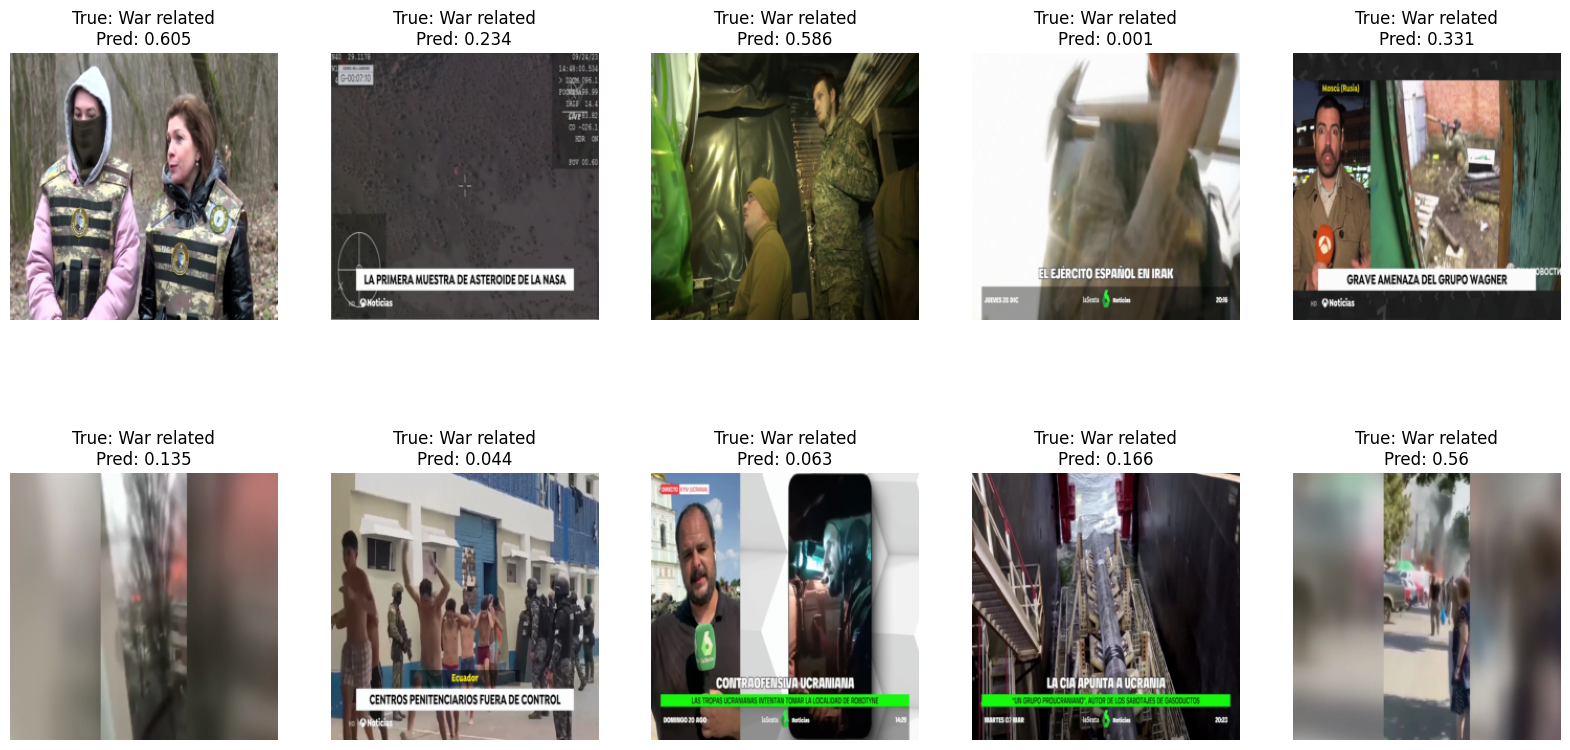

In [24]:
resnet_eval = EvaluateImages(test_images, test_labels, test_preds, test_probs)
resnet_eval.plot_false_positives(0, probs=True)

## Analysis of False Negatives

In [ ]:
resnet_eval.plot_false_negatives(0, probs=True)

## Feature Importance

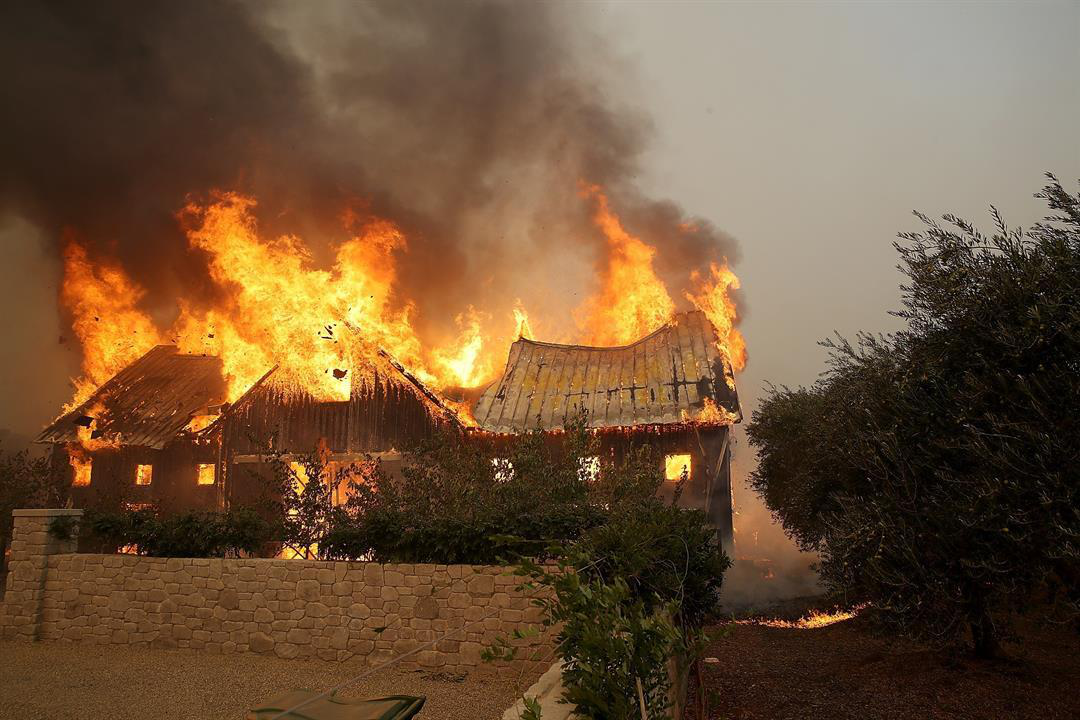

In [146]:
# Load and display the image
# image_path = '/Users/user/Desktop/backupThesis/Thesis_model/all_images/military/_80403227_025499461-1.jpg'
# image_path = '/Users/user/Desktop/Thesis---War-Image-Classification/data/all_frames/frame_atres_noche_2023-02-02_sec_1165.jpg'
# image_path = '/Users/user/Downloads/WhatsApp Image 2024-06-13 at 15.35.23.jpeg'
# image_path = '/Users/user/Desktop/Thesis---War-Image-Classification/data/labelled_images/frame_atres_noche_2022-12-03_sec_120.jpg'
# image_path = '/Users/user/Desktop/Thesis---War-Image-Classification/data/labelled_images/frame_atres_noche_2022-12-03_sec_1181.jpg'
image_path = '/Users/user/Desktop/backupThesis/Thesis_model/all_images/fire_images/917794892113498113_0.jpg'
image = Image.open(image_path)
image
# plt.imshow(image)
# plt.axis('off')  # Hide the axis
# plt.show()

In [147]:
# Apply the transformations to the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

In [148]:
# Set the model to evaluation mode
resnet50.eval()

# Move the image tensor to the same device as the model
image_tensor = image_tensor.to(device)

# Get the prediction
with torch.no_grad():
    output = resnet50(image_tensor)
    probability = torch.sigmoid(output).item()

# Convert the probability to a binary prediction
prediction = 1 if probability > 0.5 else 0

# Print the prediction
labels = {0: 'Not war', 1: 'War'}
print(f"Predicted class: '{labels[prediction]}' with probability of war being: {probability:.4f}")

Predicted class: 'War' with probability of war being: 1.0000


In [ ]:
# Define the same transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])

label = prediction

# Apply the transformations to the image
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Plot the transformed image
transformed_image = image_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()  # Remove batch dimension and convert to HWC
transformed_image = transformed_image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # De-normalize
transformed_image = np.clip(transformed_image, 0, 1)  # Clip to valid range

### Occlusion Sensitivity

In [ ]:
# Perform occlusion sensitivity analysis
resnet50.eval()
image_tensor = image_tensor.to(device)
heatmap = occlusion_sensitivity(resnet50, image_tensor, patch_size=5)

# Display the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(transformed_image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay the heatmap with the original image
plt.colorbar()
plt.title('Occlusion Sensitivity Heatmap with Mask Sliding (Patch Size Stride)')
plt.show()

### Occlusion Sensitivity (Reverse)

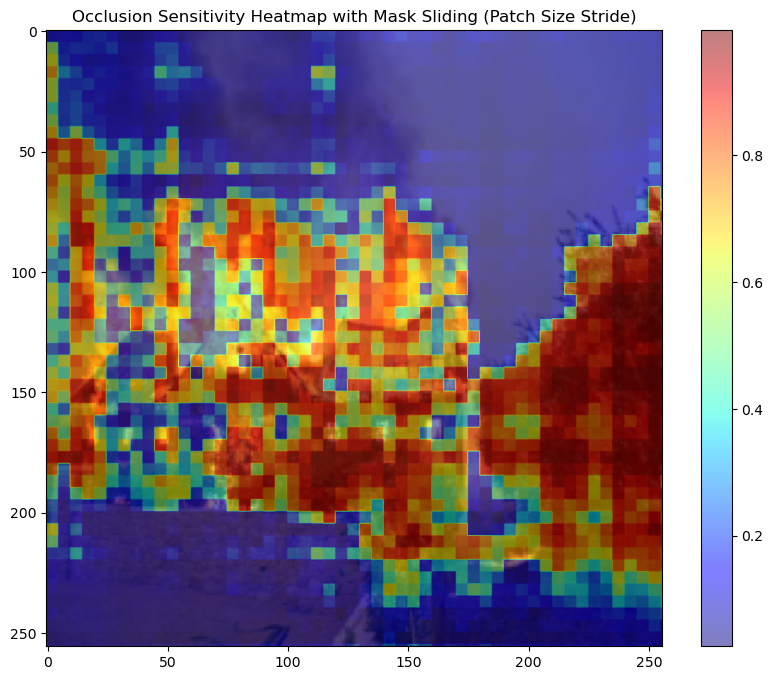

In [149]:
# Perform occlusion sensitivity analysis
resnet50.eval()
image_tensor = image_tensor.to(device)
heatmap = occlusion_sensitivity_mask(resnet50, image_tensor, patch_size=5)

# Display the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(transformed_image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay the heatmap with the original image
plt.colorbar()
plt.title('Occlusion Sensitivity Heatmap with Mask Sliding (Patch Size Stride)')
plt.show()